## Modulos necessários

In [102]:
# coloque todos os modulos que seu programa precisa aqui
import matplotlib.pyplot as plt
import math

## Função escolhida

$f(x) = 3^x - 5x$ 

In [103]:
f = lambda x: 3**x - 5*x

$f'(x) = y^3*log(3)$

In [104]:
d = lambda y: (y ** 3) * math.log(3)

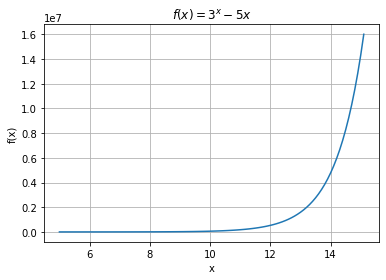

In [105]:
myrange = lambda a, b, step = 1, k = []: myrange(a + step, b, step, k + [round(a, 1)]) if a <= b else k + [round(a, 1)]
mymap = lambda f, x, k = []: k if len(x) == 0 else mymap(f, x[1:], k + [f(x[0])])

x = myrange(5, 15, 0.1)
y = mymap(lambda x: 3**x - 5*x, x)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='x', ylabel='f(x)', title=r'$f(x) = 3^x - 5x$')
ax.grid()

plt.show()

## Implementação do Método de Bisseção

In [106]:
def bissecao(f, a, b, ni, t, i=0, l=[]):
	"""
	Esta função realiza o cálculo do método de bisseção.
	f: função contínua
	a: intervalo esquerdo
	b: intervalo direito
	ni: número máximo de iterações
	t: tolerância
	"""
	x = a + (b-a) / 2
	# Condição de parada em relação ao número de vezes que será executado ni
	if i < ni:
		# Condição de parada caso o módulo seja menor que a tolerância
		if abs(b-a) < t:
			return x
		# Condição de parada caso o ponto médio em f seja 0
		if f(x) == 0:
			return x
		# Caso recursivo
		if f(x) * f(a) < 0:
			return bissecao(f,a,x,ni,t,i+1,l+[x, (b-a) / 2])
		else:
			if (b-a) != 0:
			# Caso Recursivo
				return bissecao(f,x,b,ni,t,i+1,l+[x, (b-a) / 2])
			else:
				return bissecao(f,x,b,ni,t,i+1,l)
	return l

## Implementação do Método de Newton-Raphson

In [107]:
def newtonRaphson(f, fl, xi, ni, t, i=0, l=[]):
	"""
	Esta função realiza o cálculo do método de Newton.
	f: função contínua
	fl: derivada da função 
	xi: raiz
	ni: número máximo de iterações
	t: tolerância
	"""
	# Cálculo do método de Newton para encontrar a raiz
	x1 = xi-f(xi) / fl(xi)
	# Condição de parada em relação ao número de vezes que será executado ni
	if i < ni:
		if x1 > 0:
		# Caso Recursivo
			return newtonRaphson(f,fl,x1,ni,t,i+1,l+[x1, abs((xi-x1)/x1)])
		else:
			return newtonRaphson(f,fl,x1,ni,t,i+1,l)
	return l


## Método da Secante

In [108]:
def secante(f, x0, x1, ni, t, i=0, l=[]):
	"""
	Esta função realiza o cálculo do método de bisseção.
	f: função contínua
	x0,x1: raizes	
	ni: número máximo de iterações
	t: tolerância
	"""
	f0 = f(x0)
	# Condição de parada em relação ao número de vezes que será executado ni
	if i < ni:
		f1 = f(x1)
		x2 = (x0*f1-x1*f0)/(f1-f0)
		f0=f1
		if x2 != 0 and (x2-x1) != 0:
		# Caso Recursivo
			return secante(f, x1, x2, ni, t, i+1, l+[x2, abs((x2-x1)/x2)])
		else:
			return secante(f, x1, x2, ni, t, i+1, l)
	return l

## Outras funções implementadas

In [109]:
def imprimeBis(f, a, b, ni, t, j=0, i=0, L=[]):
	"""
	Esta função imprime o resultado do método da bisseção na tela
	"""
	if ni > i:
		if j == 0:
			bis = bissecao(f, a, b, ni, t)
			L = bis
			print("==> Método da Bisseção:")
			print("-"*68)
			print("i\t\t\t  raiz  \t\t\terro")
			print("-"*68)
		print("{}\t\t{:0<20}\t\t{:0<20}".format(i+1,L[i+j],L[i+1+j]))
		return imprimeBis(f, a, b, ni, t, j+1, i+1, L)


def imprimeNew(f, a, b, ni, t, j=0, i=0, L=[]):
	"""
	Esta função imprime o resultado do método de Newton na tela
	"""
	if ni > i:
		if j == 0:
			new = newtonRaphson(f, a, b, ni, t)
			L = new
			print("==> Método de Newton Raphson:")
			print("-"*68)
			print("i\t\t\t  raiz  \t\t\terro")
			print("-"*68)
		print("{}\t\t{:0<20}\t\t{:0<20}".format(i+1,L[i+j],L[i+1+j]))
		return imprimeNew(f, a, b, ni, t, j+1, i+1, L)


def imprimeSec(f, a, b, ni, t, j=0, i=0, L=[]):
	"""
	Esta função imprime o resultado do método da secante na tela
	"""
	if ni > i:
		if j == 0:
			sec = secante(f, a, b, ni, t)
			L = sec
			print("==> Método da Secante:")
			print("-"*68)
			print("i\t\t\t  raiz  \t\t\terro")
			print("-"*68)
		print("{}\t\t{:0<20}\t\t{:0<20}".format(i+1,L[i+j],L[j+1+i]))
		return imprimeSec(f, a, b, ni, t, j+1, i+1, L)


def separarValores(L, ni, x1=[],x2=[], i=0, j=0):
	if ni > i:
		return separarValores(L, ni, x1+[L[i+j]], x2+[L[j+1+i]], j+1, i+1)
	return x1, x2

## Função `main()`

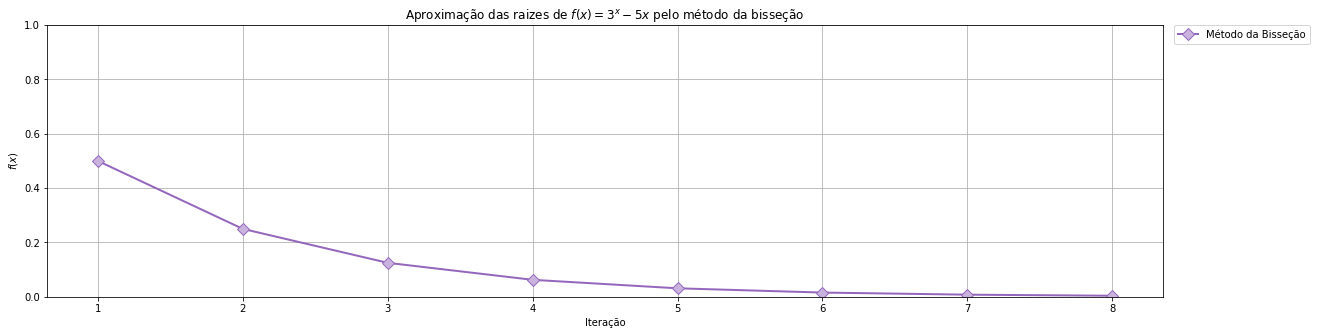

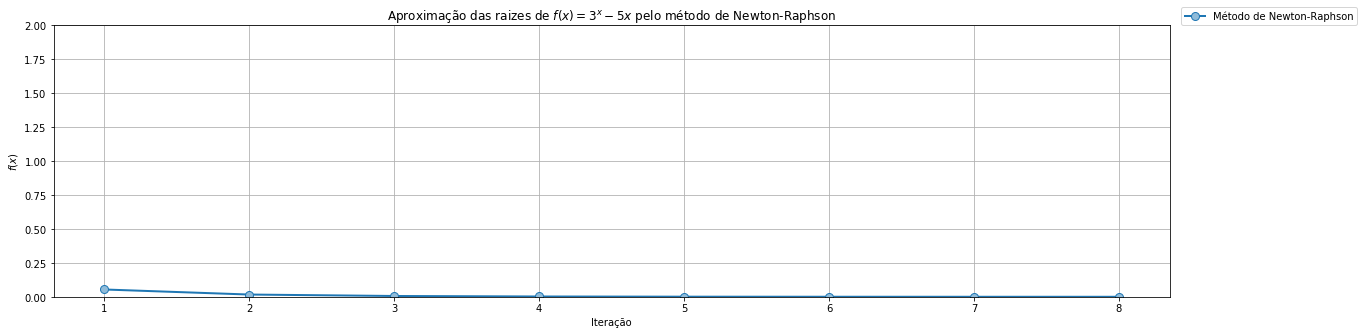

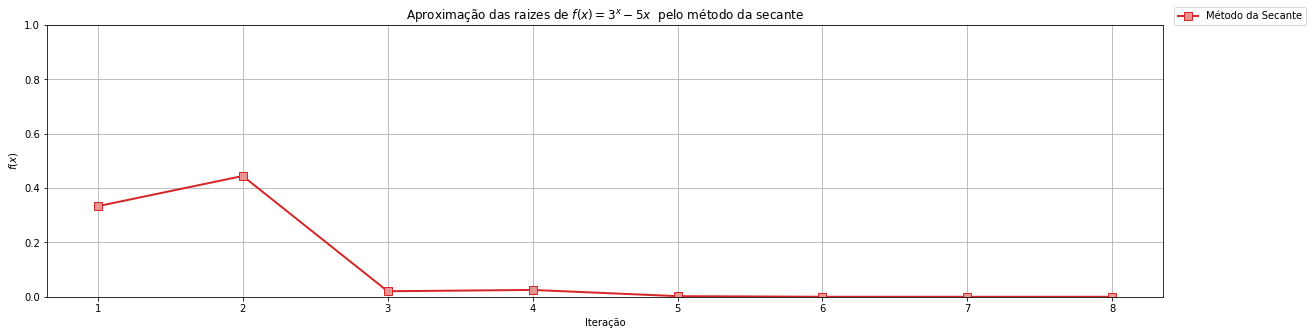

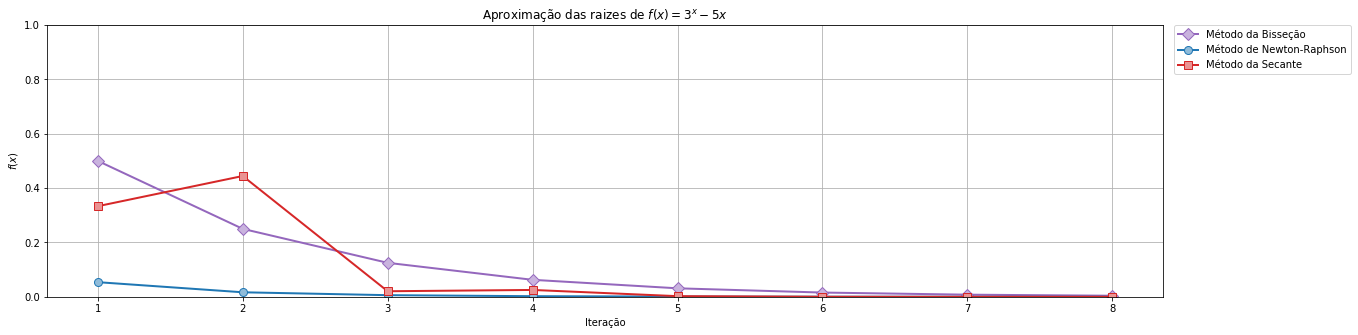

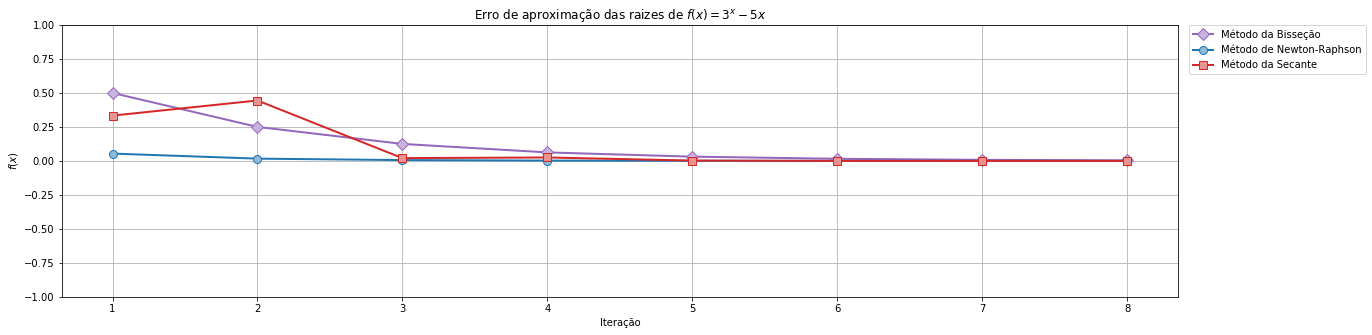

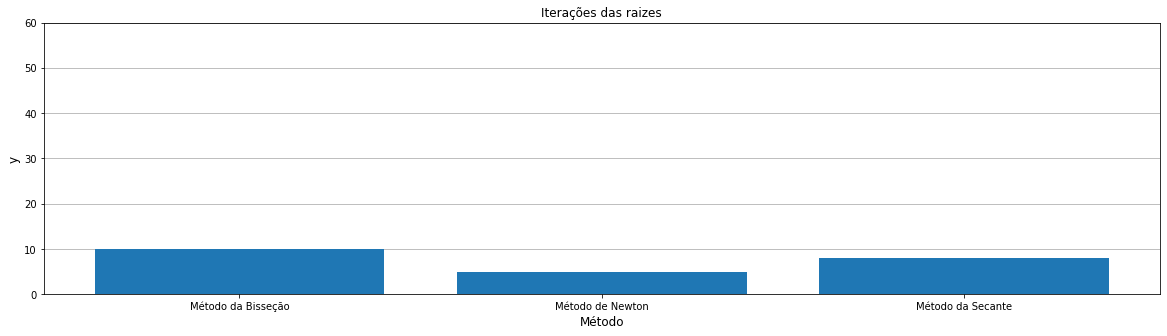

In [110]:
def main():
    a=1;b=2;ni=8;t=10**-15
    
    #Método da Bisseção
    L1 = bissecao(f,a,b,ni,t)
    x1, y1 = separarValores(L1, ni)
    
    #Método de Newton-Raphson
    L2 = newtonRaphson(f,d,b,ni,t)
    x2, y2 = separarValores(L2, ni)
    
    #Método da Secante
    L3 = secante(f,a,b,ni,t)
    x3, y3 = separarValores(L3, ni)

    
    ax1 = myrange(1, len(x1) - 1)
    bx2 = myrange(1, len(x2) - 1)
    cx3 = myrange(1, len(x3) - 1)
    ay2 = myrange(1, len(y1) - 1)
    by2 = myrange(1, len(y2) - 1)
    cy2 = myrange(1, len(y3) - 1)
    
    
    ##############################################################################################################
    # Método da Bisseção #########################################################################################
    ##############################################################################################################
    
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.plot(ax1, y1, label='Método da Bisseção', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='Iteração', ylabel='$f(x)$', title=r'Aproximação das raizes de $f(x) = 3^x - 5x$ pelo método da bisseção')
    ax.grid()
    plt.xticks(ax1)
    plt.ylim(0, 1)
    plt.savefig('grafico_bissecao.pdf',bbox_inches='tight')
    plt.show()
    
    
    ##############################################################################################################
    # Método de Newton-Raphson ###################################################################################
    ##############################################################################################################
    
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.plot(bx2, y2, label='Método de Newton-Raphson', lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=3, borderaxespad=0.)
    ax.set(xlabel='Iteração', ylabel='$f(x)$', title=r'Aproximação das raizes de $f(x) = 3^x - 5x$ pelo método de Newton-Raphson')
    ax.grid()
    plt.xticks(bx2)
    plt.ylim(0, 2)
    plt.savefig('grafico_newton.pdf',bbox_inches='tight')
    plt.show()
    
    
    ##############################################################################################################
    # Método da Secante ##########################################################################################
    ##############################################################################################################
    
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.plot(cx3, y3, label='Método da Secante', lw=2, markersize=8, color='#D62728', marker='s', markeredgecolor='#D62728', markerfacecolor='#EA9393')
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=3, borderaxespad=0.)
    ax.set(xlabel='Iteração', ylabel='$f(x)$', title=r'Aproximação das raizes de $f(x) = 3^x - 5x$  pelo método da secante')
    ax.grid()
    plt.xticks(cx3)  
    plt.ylim(0, 1)
    plt.savefig('grafico_secante.pdf',bbox_inches='tight')
    plt.show()
    
    
    ##############################################################################################################
    # Método de Aproximação ######################################################################################
    ##############################################################################################################
    
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.plot(ax1, y1, label='Método da Bisseção', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(bx2, y2, label='Método de Newton-Raphson', lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
    ax.plot(cx3, y3, label='Método da Secante', lw=2, markersize=8, color='#D62728', marker='s', markeredgecolor='#D62728', markerfacecolor='#EA9393')
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='Iteração', ylabel='$f(x)$', title=r'Aproximação das raizes de $f(x) = 3^x - 5x$')
    ax.grid()
    plt.xticks(ax1)  
    plt.ylim(0, 1)
    plt.savefig('grafico_1_raiz.pdf',bbox_inches='tight')
    plt.show()
    
    
    ##############################################################################################################
    # Erro de Aproximação ########################################################################################
    ##############################################################################################################
    
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.plot(ax1, y1, label='Método da Bisseção', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(bx2, y2, label='Método de Newton-Raphson', lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
    ax.plot(cx3, y3, label='Método da Secante', lw=2, markersize=8, color='#D62728', marker='s', markeredgecolor='#D62728', markerfacecolor='#EA9393')
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='Iteração', ylabel='$f(x)$', title=r'Erro de aproximação das raizes de $f(x) = 3^x - 5x$')
    ax.grid()
    plt.xticks(cy2) 
    plt.ylim(-1, 1)
    plt.savefig('grafico_erro.pdf',bbox_inches='tight')
    plt.show()
    
    
    ##############################################################################################################
    # Iterações #################################################################################################
    ##############################################################################################################
    
    
    x = [1, 2, 3]
    y = [10, 5, 8]
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, y, color='#1F77B4')
    ax.set_xlabel('Método', fontsize = 12)
    ax.set_ylabel('y', fontsize = 12)
    ax.set_title('Iterações das raizes', fontsize = 12)
    ax.set_axisbelow(True) 
    ax.yaxis.grid(True)
    ax.set_xticks(x)
    ax.set_xticklabels(('Método da Bisseção', 'Método de Newton', 'Método da Secante'))
    plt.ylim(0, 60) 
    plt.savefig('grafico_interacoes.pdf',bbox_inches='tight')
    plt.show()

    
# Executa a função principal do projeto
main()